In [15]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec.csv')
X=df.drop(columns=['Genre'])
y=df['Genre']
df.head()

,Age,Gender,Mood,Genre
0,18,F,Happy,Rock
1,18,F,Gloomy,Instrumental
2,18,F,Stressed,Pop
3,18,F,Relaxing,Pop
4,18,F,Energetic,Hiphop


In [23]:
df['Gender']=df['Gender'].replace({'M':0, 'F':1})
df['Mood']=df['Mood'].replace({'Happy':1, 'Gloomy':2, 'Stressed':3, 'Relaxing':4, 'Energetic':5})
df.head()

,Age,Gender,Mood,Genre
0,18,1,1,Rock
1,18,1,2,Instrumental
2,18,1,3,Pop
3,18,1,4,Pop
4,18,1,5,Hiphop


In [18]:
indp= df.iloc[:,:-1].values 
dpn= df.iloc[:,3].values

#handling missing data (Replacing missing data with the mean value)  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Fitting imputer object to the independent variables.   
imputerimputer= imputer.fit(indp[:, 1:3])  

#Replacing missing data with the calculated mean value  
indp[:, 1:3]= imputer.transform(indp[:, 1:3]) 

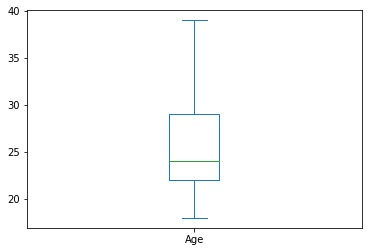

In [19]:
#Data visualization

age=df['Age']
#age.hist()
#df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
#X.plot(kind='box', subplots=True, layout(3,3), sharex=False, sharey=False)
#scatter_matrix(df)

age.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()


In [20]:
#Checking for null values to fill
null_sum=df.isnull().sum()
null_sum
data_shape=df.shape
data_shape
#df.dropna()
#df.describe

(265, 4)

In [21]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))
#df['Age'].describe()

       Age  Gender  Genre   Mood
0    False   False  False  False
1    False   False  False  False
2    False   False  False  False
3    False   False  False  False
4    False   False  False  False
..     ...     ...    ...    ...
260  False   False  False  False
261  False   False  False  False
262  False   False  False  False
263  False   False  False  False
264  False   False  False  False

[265 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_7924\3337425943.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))


In [24]:
#Model testing
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

ValueError: could not convert string to float: 'M'

In [94]:
#Feature-scaling
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
